# FINAL YEAR PROJECT

# BY AMBREEN ABDUL RAHEEM
# SUPERVISED BY SIR IMRAN BASHIR
## Pakistan NGO Fraud Detection Dataset
###📘 Overview
This dataset represents financial and operational data collected from multiple Non-Governmental Organizations (NGOs) operating across Pakistan.
The primary objective of this dataset is to analyze and detect fraudulent activities in NGO project funding and expense reporting.

The data includes information about project proposals, financial requests, bank details, vendors, population demographics, and audit indicators.
It can be used to identify suspicious trends, detect anomalies, and build machine learning models for fraud detection in the non-profit sector.

🧩 Dataset Structure

Column Name	Description

- Date:	Date when the project application or transaction was recorded.
- Applicant_Name:	Name of the person or representative submitting the application.
- NGO_Name:	Registered name of the NGO involved in the project.
- City_Town_Village:	Geographical area where the NGO operates or the project takes place.
- Project_Name:	Title or description of the project submitted for funding.
- Requested_Amount_PKR:	The amount requested by the NGO for the project (in PKR).
- Legitimate_Estimate_PKR:	The legitimate or auditor-approved estimate of required funding.
- Fraud_Type:	Indicates whether the project is approved or fraudulent and what kind of fraud occurred.
- Fraud_Indicator:	Qualitative description of audit findings or irregularities.
Population_Census_Record	Official population data of the area (for demographic comparison).
- Invoice_ID:	Unique identifier for the submitted invoice.
- Vendor_Name:	The vendor or supplier linked with project purchases or reimbursements.
- Bank_Reference_No:	Transaction or reference number associated with NGO's funding transfer.
- Bank_Name:	Bank used by the NGO for fund transfer.
- Is_Fraud:	Boolean field (True/False) indicating if the case was identified as fraud.
- Implied_Fraud_Ratio:	Computed ratio that estimates the scale of fraud relative to project size.

🎯 Purpose of Analysis
This dataset is designed to help data analysts, auditors, and government agencies identify fraud patterns and high-risk NGOs or vendors.
The key goals include:

1- Detecting financial anomalies such as exaggerated funding requests.

2- Understanding geographic and institutional risk factors contributing to fraud.

3- Monitoring bank and vendor activities for repeated fraudulent behavior.

4- Training predictive machine learning models for early fraud detection.

5- Enhancing transparency and accountability in Pakistan’s non-profit and development sector.

💡 Potential Use Cases

- Fraud Detection Systems: Build models that predict if a project proposal is likely to be fraudulent.
- Audit Dashboards: Visualize NGO activities, high-risk zones, and suspicious transactions.
- Policy Design: Help government agencies strengthen NGO regulations and funding procedures.
- Vendor Screening: Detect vendors repeatedly involved in fraudulent projects.
- Educational Projects: Ideal dataset for learning data cleaning, EDA, and fraud detection with Python or Power BI.

⚠️ Disclaimer
This dataset is synthetic but realistic, created for educational and analytical purposes.
It does not represent any real NGO or individual but mimics actual data patterns observed in NGO funding and fraud audits.

In [38]:
# Full Cleaned Fraud Detection Project with NGO Data

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [46]:
df1 = pd.read_csv('/content/pakistan_ngo_fraud_perfect_dataset.csv')

In [52]:
df1.head(10)

,Date,Applicant_Name,NGO_Name,City_Town_Village,Project_Name,Requested_Amount_PKR,Legitimate_Estimate_PKR,Fraud_Type,Fraud_Indicator,Population_Census_Record,Invoice_ID,Vendor_Name,Bank_Reference_No,Bank_Name,Is_Fraud,Implied_Fraud_Ratio
0,3/19/2024,Khadija Anwar,Sahara Development Foundation,Multan,Maternal and Child Health Outreach,"Rs 1,216,200","Rs 1,216,200",Approved,Compliant with Guidelines,"1,871,843",INV-NF57VH2D,GreenLeaf Construction,BR-SCB-4302499307,Standard Chartered Pakistan,False,0.000
1,1/15/2021,Hassan Qureshi,Sahara Development Foundation,Lahore,Rural School Rehabilitation,"Rs 546,400","Rs 489,824",Expense/Reimbursement Fraud,Invoices lack vendor contact details,"11,126,285",INV-YAECEEUT,GreenLeaf Construction,BR-ABL-4314102640,Allied Bank,True,0.104
2,6/13/2022,Khadija Ahmed,Green Villages Pakistan,Quetta,Maternal and Child Health Outreach,"Rs 1,194,400","Rs 342,243",Grant Application Fraud,Project timeline unrealistic,"1,001,205",INV-GYMRRQSR,GreenLeaf Construction,BR-ASK-7109989950,Askari Bank,True,0.713
3,6/28/2024,Hira Shah,Roshan Welfare Trust,Sukkur,Community Health Camps,"Rs 423,800","Rs 423,800",Approved,Compliant with Guidelines,"551,357",INV-XI5P2QFS,Metro Office Solutions,BR-NBP-0400160385,National Bank of Pakistan,False,0.000
4,12/13/2021,Ali Butt,Green Villages Pakistan,Rawalpindi,Maternal and Child Health Outreach,"Rs 11,743,200","Rs 11,743,200",Approved,Compliant with Guidelines,"2,098,231",INV-A42W44WU,PakTech Equipments,BR-UBL-9375262635,United Bank Limited,False,0.000
5,9/18/2024,Fatima Mirza,Green Villages Pakistan,Karachi,Clean Water & Sanitation Project,"Rs 104,000","Rs 104,000",Approved,Compliant with Guidelines,"14,916,456",INV-CERT7AWR,Sunrise Stationers,BR-NBP-7984404211,National Bank of Pakistan,False,0.000
6,3/27/2023,Mubashir Malik,Naya Umeed NGO,Peshawar,Maternal and Child Health Outreach,"Rs 128,000","Rs 128,000",Approved,Compliant with Guidelines,"1,970,042",INV-G3TY36MA,SafeHands Pharmaceuticals,BR-FBL-2116453931,Faysal Bank,False,0.000
7,8/1/2024,Mehwish Saleem,Green Villages Pakistan,Peshawar,Maternal and Child Health Outreach,"Rs 89,600","Rs 56,568",Procurement & Vendor Fraud,Project timeline unrealistic,"1,970,042",INV-764HSRTS,GreenLeaf Construction,BR-HBL-1007933570,Habib Bank Limited,True,0.369
8,10/29/2021,Nadia Farooq,Roshan Welfare Trust,Quetta,Maternal and Child Health Outreach,"Rs 1,191,700","Rs 1,191,700",Approved,Compliant with Guidelines,"1,001,205",INV-72DD9EQS,United Medical & Relief Vendors,BR-NBP-2277247047,National Bank of Pakistan,False,0.000
9,1/2/2022,Zara Anwar,Sahara Development Foundation,Lahore,Community Health Camps,"Rs 1,750,700","Rs 1,750,700",Approved,Compliant with Guidelines,"11,126,285",INV-LLJ0VGWG,BlueSky Logistics,BR-ABL-1705524929,Allied Bank,False,0.000


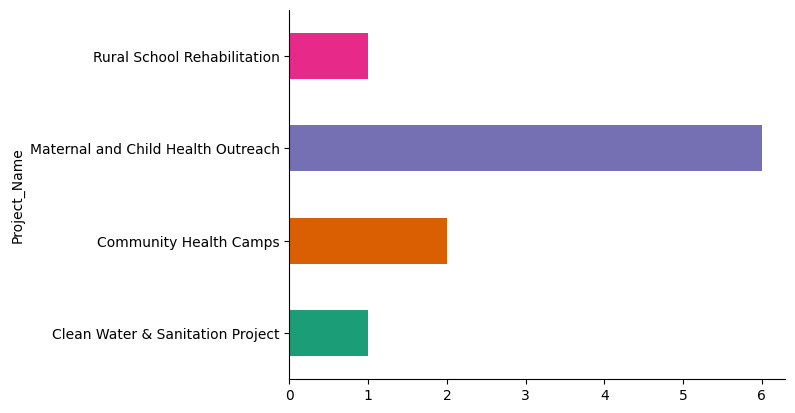

In [56]:
_df_41.groupby('Project_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

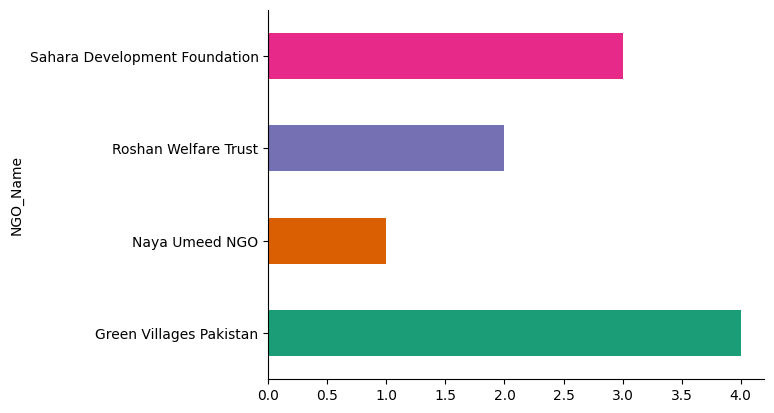

In [55]:
_df_39.groupby('NGO_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [57]:
# -------- Feature Engineering --------

# 1️⃣ Clean numeric fields
def clean_amount(x):
    if isinstance(x, str):
        return float(x.replace("Rs", "").replace(",", "").strip())
    return x

df1["Requested_Amount_PKR"] = df1["Requested_Amount_PKR"].apply(clean_amount)
df1["Legitimate_Estimate_PKR"] = df1["Legitimate_Estimate_PKR"].apply(clean_amount)
df1["Population_Census_Record"] = df1["Population_Census_Record"].replace(",", "", regex=True).astype(float)

# 2️⃣ Fund Gap (requested vs legitimate)
df1["Fund_Gap_PKR"] = df1["Requested_Amount_PKR"] - df1["Legitimate_Estimate_PKR"]

# # 3️⃣ Fund Deviation Ratio
# df["Fund_Deviation_Ratio"] = (
#     df["Fund_Gap_PKR"] / df["Legitimate_Estimate_PKR"].replace(0, np.nan)
# ).fillna(0)

# 4️⃣ Population Influence — funding per capita
df1["Funding_per_Capita"] = df1["Requested_Amount_PKR"] / df1["Population_Census_Record"]
df1["Funding_per_Capita"].fillna(0, inplace=True)

# 6️⃣ Bank Frequency — how many projects per bank
bank_counts = df1["Bank_Name"].value_counts().to_dict()
df1["Bank_Frequency"] = df1["Bank_Name"].map(bank_counts)


# 8️⃣ Fraud Label Encoding (convert True/False → 1/0)
df1["Is_Fraud"] = df1["Is_Fraud"].astype(int)

# 🎯 Final engineered dataset
engineered_features = [
    "Requested_Amount_PKR", "Legitimate_Estimate_PKR", "Fund_Gap_PKR",
    "Funding_per_Capita", "Implied_Fraud_Ratio", "Is_Fraud"
]

df1_final = df1[engineered_features]
df1_final.head()


/tmp/ipython-input-3871700747.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Funding_per_Capita"].fillna(0, inplace=True)


,Requested_Amount_PKR,Legitimate_Estimate_PKR,Fund_Gap_PKR,Funding_per_Capita,Implied_Fraud_Ratio,Is_Fraud
0,1216200.0,1216200.0,0.0,0.649734,0.000,0
1,546400.0,489824.0,56576.0,0.049109,0.104,1
2,1194400.0,342243.0,852157.0,1.192962,0.713,1
3,423800.0,423800.0,0.0,0.768649,0.000,0
4,11743200.0,11743200.0,0.0,5.596715,0.000,0


In [58]:
# ------------------- Step 4: Scaling ----------------------

# Separate features (X) and target (y)
X = df1_final.drop('Is_Fraud', axis=1)
y = df1_final['Is_Fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# ------------------- Step 5: Autoencoder Model ----------------------

# Separate normal (non-fraud) data for training
X_normal = X_scaled[y == 0]
X_fraud = X_scaled[y == 1]

input_dim = X_scaled.shape[1]

# Autoencoder Architecture
autoencoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Reconstruct input
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train only on normal (non-fraud) data
history = autoencoder.fit(
    X_normal, X_normal,
    epochs=50,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 0.8376 - val_loss: 0.8122
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7319 - val_loss: 0.7600
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7002 - val_loss: 0.7165
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6392 - val_loss: 0.6782
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6130 - val_loss: 0.6420
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.5800 - val_loss: 0.6089
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5689 - val_loss: 0.5794
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5025 - val_loss: 0.5504
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4657 - val_loss: 0.5199
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4410 - val_loss: 0.4900
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4146 - val_loss: 0.4594
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3785 - val_loss: 0.4276
Epoch 13/50

In [64]:
# Reconstruction error for all data
X_pred = autoencoder.predict(X_scaled)
recon_error = np.mean(np.square(X_scaled - X_pred), axis=1)

# Save reconstruction errors
df_scaled['Reconstruction_Error'] = recon_error

# Threshold for anomaly detection (fraud)
threshold = np.percentile(recon_error, 95)
df_scaled['Predicted_Fraud'] = (df_scaled['Reconstruction_Error'] > threshold).astype(int)

# Preview predictions
df_scaled[['Is_Fraud', 'Predicted_Fraud', 'Reconstruction_Error']].head()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Is_Fraud,Predicted_Fraud,Reconstruction_Error
0,0,0,0.000853
1,1,0,0.040577
2,1,1,2.620224
3,0,0,0.000244
4,0,0,0.001616


In [28]:
# ------------------- Step 6: Anomaly Detection ----------------------

# Reconstruct all NGO data
reconstructions = autoencoder.predict(X_scaled)

# Calculate reconstruction error (MSE)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Dynamic threshold (3 standard deviations above mean)
threshold = np.mean(mse) + 3 * np.std(mse)

# Label as Fraud (1) or Normal (0)
df['Reconstruction_Error'] = mse
df['Predicted_Fraud'] = (df['Reconstruction_Error'] > threshold).astype(int)

# Summary
print("🔍 Threshold:", round(threshold, 6))
print("🚨 Potential Frauds Detected:", df['Predicted_Fraud'].sum())

# Compare with actual labels if available
if 'Is_Fraud' in df.columns:
    from sklearn.metrics import confusion_matrix, classification_report

    print("\n📊 Confusion Matrix:")
    print(confusion_matrix(df['Is_Fraud'], df['Predicted_Fraud']))

    print("\n📈 Classification Report:")
    print(classification_report(df['Is_Fraud'], df['Predicted_Fraud']))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
🔍 Threshold: 6.173697
🚨 Potential Frauds Detected: 9

📊 Confusion Matrix:
[[400   0]
 [191   9]]

📈 Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       400
           1       1.00      0.04      0.09       200

    accuracy                           0.68       600
   macro avg       0.84      0.52      0.45       600
weighted avg       0.78      0.68      0.57       600



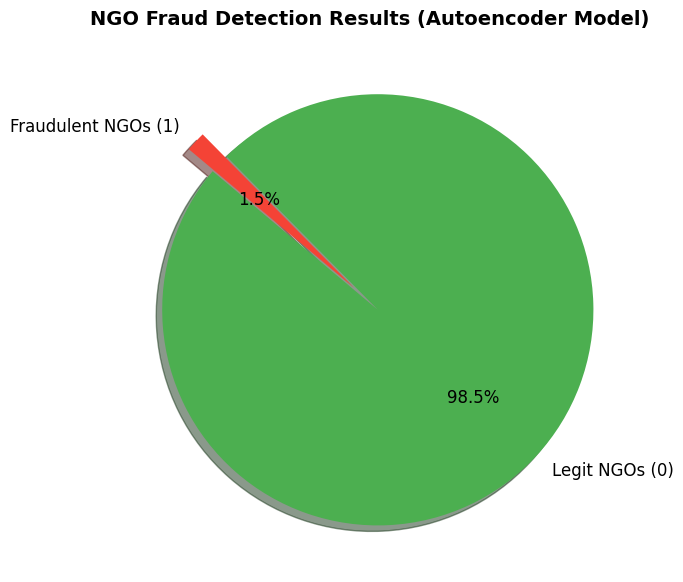

In [31]:
# ------------------- Step 7: Visualizations ----------------------

import matplotlib.pyplot as plt

# Count of fraud vs non-fraud
fraud_counts = df['Predicted_Fraud'].value_counts()

# Labels
labels = ['Legit NGOs (0)', 'Fraudulent NGOs (1)']
colors = ['#4CAF50', '#F44336']  # Green for legit, Red for fraud

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    fraud_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=(0.05, 0.1),
    shadow=True,
    textprops={'fontsize': 12}
)

plt.title("NGO Fraud Detection Results (Autoencoder Model)", fontsize=14, fontweight='bold')
plt.show()


In [34]:
# Show few detected fraud NGOs
print("🚨 Top Detected Fraudulent NGOs:")
df[df['Predicted_Fraud'] == 1]


🚨 Top Detected Fraudulent NGOs:


,Date,Applicant_Name,NGO_Name,City_Town_Village,Project_Name,Requested_Amount_PKR,Legitimate_Estimate_PKR,Fraud_Type,Fraud_Indicator,Population_Census_Record,...,Is_Fraud,Implied_Fraud_Ratio,Fund_Gap_PKR,Fund_Deviation_Ratio,Funding_per_Capita,Vendor_Frequency,Bank_Frequency,Project_Repetition,Reconstruction_Error,Predicted_Fraud
105,8/3/2022,Aisha Farooq,Green Villages Pakistan,Quetta,Community Health Camps,10060600.0,5221715.0,Grant Application Fraud,Mismatch between receipts and bank statements,1001205.0,...,1,0.481,4838885.0,0.926685,10.048492,48,63,59,7.403084,1
123,12/31/2024,Usman Anwar,Sehat & Taleem Initiative,Multan,Rural School Rehabilitation,12148200.0,3921943.0,Grant Application Fraud,Duplicate invoices found,1871843.0,...,1,0.677,8226257.0,2.097495,6.489967,66,54,72,20.520934,1
253,2/15/2024,Khadija Javed,Sahara Development Foundation,Abbottabad,Community Health Camps,11581700.0,4377108.0,Grant Application Fraud,Multiple claims for same expense,208491.0,...,1,0.622,7204592.0,1.645971,55.550120,63,54,59,18.605696,1
345,8/10/2024,Imran Raza,Sehat & Taleem Initiative,Peshawar,Livelihoods: Small Business Grants,10588100.0,4822516.0,Grant Application Fraud,Ghost vendor detected,1970042.0,...,1,0.545,5765584.0,1.195555,5.374555,59,70,47,10.327762,1
391,6/1/2021,Fahad Ahmed,Green Villages Pakistan,Sialkot,Community Health Camps,12091500.0,3122861.0,Grant Application Fraud,Budget line items inflated,1796151.0,...,1,0.742,8968639.0,2.871930,6.731895,63,70,59,24.380047,1
505,1/5/2021,Mehwish Butt,Green Villages Pakistan,Lahore,Girls EDUCATION Drive,11836700.0,4204915.0,Grant Application Fraud,Project timeline unrealistic,11126285.0,...,1,0.645,7631785.0,1.814968,1.063850,70,67,58,17.528457,1
566,12/25/2022,Zara Khan,Sahara Development Foundation,Multan,Vocational Training for Youth,10224700.0,5615226.0,Grant Application Fraud,Multiple claims for same expense,1871843.0,...,1,0.451,4609474.0,0.820888,5.462371,59,63,62,6.631063,1
568,8/21/2021,Mehwish Hussain,Sahara Development Foundation,Quetta,Vocational Training for Youth,10927000.0,6301291.0,Grant Application Fraud,Beneficiary counts inconsistent,1001205.0,...,1,0.423,4625709.0,0.734089,10.913849,61,67,62,6.539875,1
598,7/10/2023,Usman Ahmed,Green Villages Pakistan,Abbottabad,Maternal and Child Health Outreach,6977800.0,2487674.0,Grant Application Fraud,Project timeline unrealistic,208491.0,...,1,0.643,4490126.0,1.804950,33.468111,49,63,65,7.948232,1


🧠 Insight Note: Fraud Detection Visualization

The pie chart above represents the distribution of legitimate vs. fraudulent NGOs as detected by the Autoencoder model.

The red portion indicates NGOs flagged as potentially fraudulent, i.e., organizations whose financial or operational patterns significantly deviate from the normal data distribution.

The green portion represents legitimate NGOs that follow typical patterns and exhibit consistent, transparent behavior in their funding and operations.

The imbalance between the two segments reflects that most NGOs operate normally, while only a small proportion show anomaly-like behavior, which may correspond to potential frauds.

Such visualization is crucial for:

Quickly understanding the overall risk exposure within the NGO sector.

Identifying how many cases need deeper audit or review.

Communicating results effectively to decision-makers, auditors, or anti-fraud teams in NGOs or government bodies.

By combining Autoencoder-based anomaly detection with visual analytics, we can make data-driven and transparent decisions about which organizations warrant further investigation.